# Hoja de trabajo 1 - Regresión lineal regularizada

### Inteligencia artificial - Sección 10
### María Fernanda Estrada 14198
### 02/03/2020

##### Librerías necesarias: numpy y matplotlib

In [27]:
# Importar librerias necesarias
import numpy as np
from matplotlib import pyplot as plt

##### Funciones necesarias: costo regularizado, derivada costo regularizado y descenso al gradiente

In [53]:
# Funcion de costo regularizado
# Codigo base visto en clase dado por Samuel
def linear_cost(X, y, theta, num_lambda):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    regul = theta ** 2
    return (sq.sum() + np.sum(num_lambda * regul)) / (2 * m)

In [29]:
# Funcion de derivada de costo regularizado
# Codigo base visto en clase dado por Samuel
def linear_cost_derivate(X, y, theta, num_lambda):
    h = np.matmul(X, theta)
    m, _ = X.shape
    regul = (num_lambda / m) * theta.sum()
    return (np.matmul((h - y).T, X).T + regul) / m

In [49]:
# Funcion de descenso al gradiente
# Codigo base visto en clase dado por Samuel
def gradient_descent(
        X,
        y,
        theta_0,
        cost,
        cost_derivate,
        num_lambda=0.1,
        alpha=0.01,
        treshold=0.0001,
        max_iter=10000):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta, num_lambda)) > treshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta, num_lambda)
        i += 1
        costs.append(cost(X, y, theta, num_lambda))
        gradient_norms.append(cost_derivate(X, y, theta, num_lambda))
    return theta, costs, gradient_norms

##### Leer datos de csv

In [31]:
# Leer datos de csv
my_data = np.genfromtxt('Admission_Predict.csv', delimiter=',', skip_header=1)

##### Ánalisis de variables en el dataset

Vamos graficando feature por feature contra Chance of Admit para determinar qué variables son significativas para predecir Chance of Admit. Descartamos de una vez la primera columna Serial No. porque solo es un indicador de posición de fila. Según las siguientes gráficas, solo las features GRE Score, TOEFL Score y CGPA tienen una fuerte relación al determinar si la persona puede entrar a la Universidad o no. No se eligieron el resto porque al ser datos discretos y no continuos pueden dañar el modelo.

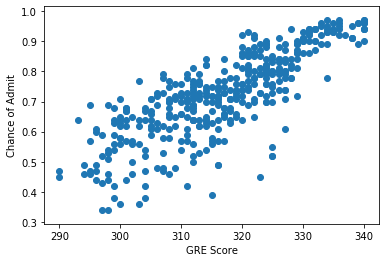

In [34]:
# GRE Score vrs Chance of Admit
plt.scatter(my_data[:,1], my_data[:, 8])
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.show()

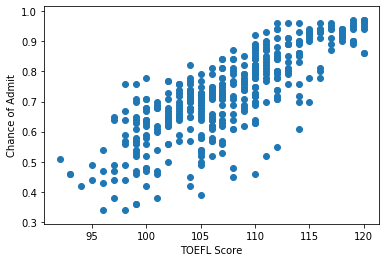

In [35]:
# TOEFL Score vrs Chance of Admit
plt.scatter(my_data[:, 2], my_data[:, 8])
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.show()

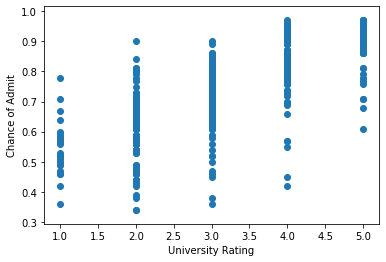

In [36]:
# University Rating vrs Chance of Admit
plt.scatter(my_data[:, 3], my_data[:, 8])
plt.xlabel("University Rating")
plt.ylabel("Chance of Admit")
plt.show()

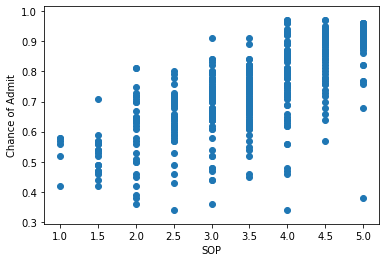

In [37]:
# SOP vrs Chance of Admit
plt.scatter(my_data[:, 4], my_data[:, 8])
plt.xlabel("SOP")
plt.ylabel("Chance of Admit")
plt.show()

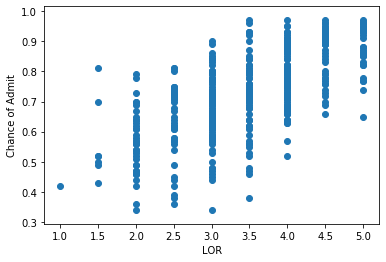

In [38]:
# LOR vrs Chance of Admit
plt.scatter(my_data[:, 5], my_data[:, 8])
plt.xlabel("LOR")
plt.ylabel("Chance of Admit")
plt.show()

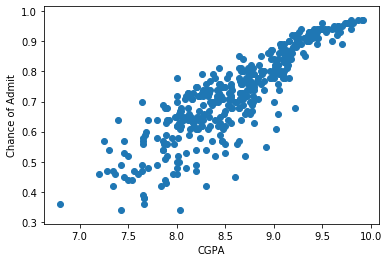

In [39]:
# CGPA vrs Chance of Admit
plt.scatter(my_data[:, 6], my_data[:, 8])
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.show()

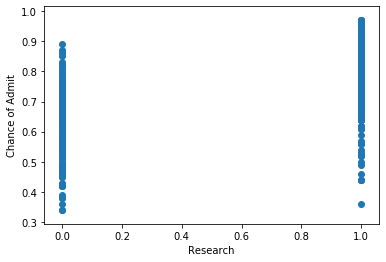

In [40]:
# Research vrs Chance of Admit
plt.scatter(my_data[:, 7], my_data[:, 8])
plt.xlabel("Research")
plt.ylabel("Chance of Admit")
plt.show()

### Modelos

Se toma una división de: Training (60%), Test (20%), Cross Validation (20%).
También se neceita saber el grado de cada feature para colocarlo cuando se analicen las tres juntas, así que se necesitan tres subdatasets para cada feature y un modelo de cada una.

##### Modelo GRE Score

El siguiente modelo se dejó con potencia 2, ya que mayores a 2 arrojaban resultados inf. Si se agrandaba alpha, también daba resultados indefinidos. Si se bajaban la cantidad de iteraciones, el modelo estaba totalmente erróneo. El valor /1000 es para que no resulte en inf.

THETA VECTOR: [[ 0.58725357]
 [-0.00934961]
 [ 0.03079954]]


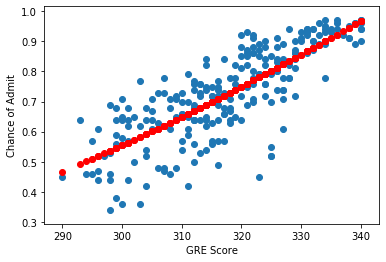

In [94]:
# Array de la primera columna GRE Score
Xgre_score = np.array(my_data[:240, 1])

# Agregamos columna de 1s y cambiamos su forma
X = np.vstack(
    (
        np.ones(240),
        Xgre_score,
        (Xgre_score ** 2)/1000,
    )
).T

# y del conjunto de training (este se usara para todos los modelos)
y = (np.array(my_data[:240, 8])).reshape(240,1)

# Generacion del modelo
m, n = X.shape
theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    num_lambda = 10,
    alpha=0.00001,
    treshold=0.0001,
    max_iter=100000
)

# Valores de vector theta
print ('THETA VECTOR:', theta)

# Grafica del modelo
plt.scatter(X[:, 1], y)
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.scatter(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

##### Modelo TOEFL Score

El siguiente modelo se dejó con potencia 2, ya que mayores a 2 arrojaban resultados inf. Los mismos valores de alpha, lambda, treshold e iteraciones quedaron igual.

THETA VECTOR: [[ 0.0981371 ]
 [-0.00819247]
 [ 0.01290294]]


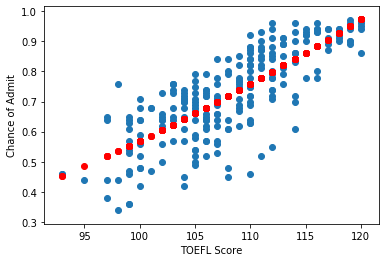

In [98]:
# Array de la segunda columna TOEFL Score
Xtoefl_score = np.array(my_data[:240, 2])

# Agregamos columna de 1s y cambiamos su forma
X = np.vstack(
    (
        np.ones(240),
        Xtoefl_score,
        (Xtoefl_score ** 2)/100,
    )
).T

# y del conjunto de training (este se usara para todos los modelos)
y = (np.array(my_data[:240, 8])).reshape(240,1)

# Generacion del modelo
m, n = X.shape
theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    num_lambda = 10,
    alpha=0.00001,
    treshold=0.0001,
    max_iter=100000
)

# Valores de vector theta
print ('THETA VECTOR:', theta)

# Grafica del modelo
plt.scatter(X[:, 1], y)
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.scatter(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

##### Modelo CGPA

El siguiente modelo se dejó con potencia 4, ya que potencias menores a 4 daban un mal modelo (lineal, casi constante). Las iteraciones de 100,000 no eran suficientes así que se fueron aumentando de 100,000 en 100,000 hasta alcanzar el ideal de 300,000. Los demás datos de alpha, lambda y treshold permanecieron igual a los otros modelos.

THETA VECTOR: [[0.08156618]
 [0.02853676]
 [0.00697413]]


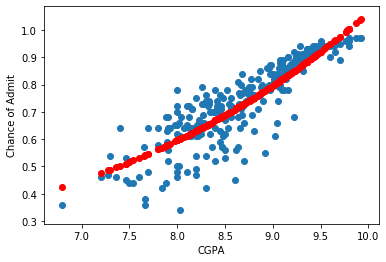

In [102]:
# Array de la segunda columna CGPA
Xcgpa = np.array(my_data[:240, 6])

# Agregamos columna de 1s y cambiamos su forma
X = np.vstack(
    (
        np.ones(240),
        Xcgpa,
        (Xcgpa ** 4)/100,
    )
).T

# y del conjunto de training (este se usara para todos los modelos)
y = (np.array(my_data[:240, 8])).reshape(240,1)

# Generacion del modelo
m, n = X.shape
theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    num_lambda = 10,
    alpha=0.00001,
    treshold=0.00001,
    max_iter=300000
)

# Valores de vector theta
print ('THETA VECTOR:', theta)

# Grafica del modelo
plt.scatter(X[:, 1], y)
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")
plt.scatter(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

##### Modelo GRE Score / TOEFL Score / CGPA

Gracias a los modelos anteriores, sabemos las potencias de cada feature: GRE Score potencia 2, TOEFL Score potencia 2 y CGPA potencia 4. Se observa en la gráfica que ésta sigue la tendencia del training set.

THETA VECTOR: [[0.04717045]
 [0.0015585 ]
 [0.00129123]
 [0.00648724]]


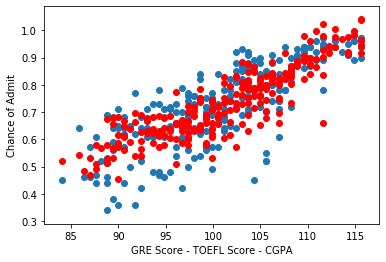

In [105]:
# Agregamos columna de 1s y cambiamos su forma
X = np.vstack(
    (
        np.ones(240),
        (Xgre_score ** 2)/1000,
        (Xtoefl_score ** 2)/100,
        (Xcgpa ** 4)/100,
    )
).T

# y del conjunto de training (este se usara para todos los modelos)
y = (np.array(my_data[:240, 8])).reshape(240,1)

# Generacion del modelo
m, n = X.shape
theta_0 = np.random.rand(n, 1)
theta, costs, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    num_lambda = 10,
    alpha=0.00001,
    treshold=0.0001,
    max_iter=300000
)

# Valores de vector theta
print ('THETA VECTOR:', theta)

# Grafica del modelo
plt.scatter(X[:, 1], y)
plt.xlabel("GRE Score - TOEFL Score - CGPA")
plt.ylabel("Chance of Admit")
plt.scatter(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

### Test y CV

Observando la siguiente gráfica, se puede observar que predijo bastante bien los datos en el dataset de test; sigue la misma tendencia y la separación entre puntos es poca.

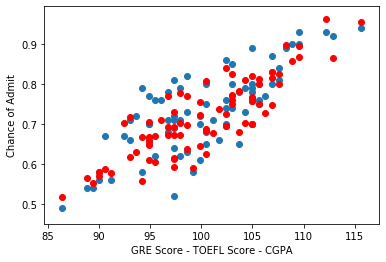

In [107]:
# Data sets de tests
Xgre_score_test = np.array(my_data[241:321, 1])
Xtoefl_score_test = np.array(my_data[241:321, 2])
Xcgpa_test = np.array(my_data[241:321, 6])

# Test
X = np.vstack(
    (
        np.ones(80),
        (Xgre_score_test ** 2)/1000,
        (Xtoefl_score_test ** 2)/100,
        (Xcgpa_test ** 4)/100,
    )
).T

# y del conjunto de test
y = (np.array(my_data[241:321, 8])).reshape(80,1)

# Se realizan los puntos de la regresion y los puntos de la prediccion
plt.scatter(X[:, 1], y)
plt.xlabel("GRE Score - TOEFL Score - CGPA")
plt.ylabel("Chance of Admit")
plt.scatter(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

En cuanto a la predicción en el cross validation, también fue bastante buena porque sigue la tendencia y la distancia entre los puntos reales y la predicción es poca.  Solo hay que notar que los datos atípicos bajos de Chance of Admit pueden afectar estos resultados.

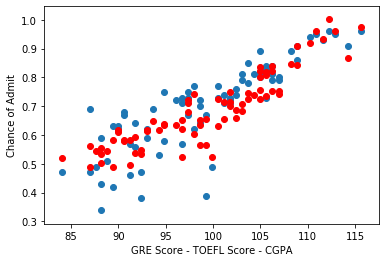

In [109]:
# Data sets de CV
Xgre_score_cv = np.array(my_data[322:401, 1])
Xtoefl_score_cv = np.array(my_data[322:401, 2])
Xcgpa_cv = np.array(my_data[322:401, 6])

# CV
X = np.vstack(
    (
        np.ones(78),
        (Xgre_score_cv ** 2)/1000,
        (Xtoefl_score_cv ** 2)/100,
        (Xcgpa_cv ** 4)/100,
    )
).T

# y del conjunto de CV
y = (np.array(my_data[322:401, 8])).reshape(78,1)

# Se realizan los puntos de la regresion y los puntos de la prediccion
plt.scatter(X[:, 1], y)
plt.xlabel("GRE Score - TOEFL Score - CGPA")
plt.ylabel("Chance of Admit")
plt.scatter(X[:, 1], np.matmul(X, theta), color='red')
plt.show()

### Conclusión

Observando las gráficas del training set y de los tests, se puede observar que la predicción sigue la tendencia de los puntos y la distancia entre el valor real y la predicción es cercana. Es por esto que se concluye que es un buen modelo. El valor de lambda para la regularización se fue aumentando de 2 en 2, a prueba y error se encontró que el mejor valor era de 10.